In [31]:
# Packages importing
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [32]:
## mnist datasets processing
# Load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape
L, W, H = train_images.shape
train_images = train_images.reshape((60000, W*H))
train_images = train_images.astype('float32')/255

# Binary target (one hot encoding)
train_labels = to_categorical(train_labels)

## Implementation of 1-layer NN mnist datasets
# network design
model = models.Sequential()
model.add(layers.Dense(W*H, activation='relu', input_shape=(W*H,))) # input layer
model.add(layers.Dense(10, activation='softmax'))                   # output layer
model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [33]:
## Fitting and evaluation
h = model.fit(train_images, train_labels, epochs=20)    # set epochs to 20

Epoch 1/20
   1/1875 [..............................] - ETA: 7:30 - loss: 2.3735 - accuracy: 0.0000e+00

2023-04-01 04:46:44.959889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 19s 10ms/step - loss: 0.1916 - accuracy: 0.9430
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0862 - accuracy: 0.9750
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0636 - accuracy: 0.9824
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0476 - accuracy: 0.9863
Epoch 5/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0385 - accuracy: 0.9896
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0307 - accuracy: 0.9919
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0265 - accuracy: 0.9933
Epoch 8/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0209 - accuracy: 0.9948
Epoch 9/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0164 - accuracy: 0.9956
Epoch 10/20
1875/1875 [==============================] - 18s 10ms/step - lo

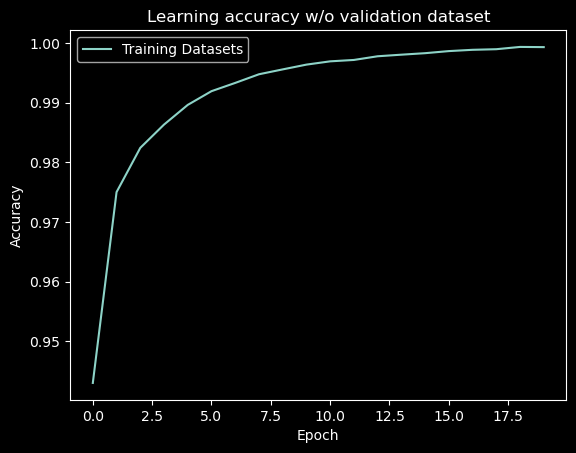

<Figure size 640x480 with 0 Axes>

In [35]:
## Plotting func
def plot_acc_without_valid(h):  # w/o validation datasets
    plt.plot(h.history['accuracy'])
    plt.title("Learning accuracy w/o validation dataset")
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(["Training Datasets"], loc=0)

def plot_acc_with_valid(h):     # w/ validation data
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title("Learning accuracy w/ validation dataset")
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(["Training", "Validation"], loc=0)

plot_acc_without_valid(h)
plt.show()
plt.clf()